# Assignment-4 (Perceptron, SVM, and Neural Networks)

This part of the assignment shall require you to code the perceptron classifier from the ground up. The perceptron classifier takes uses the weighted sum of input features, uses a threshold to classify between two classes. Usually these classes are -1 and 1 while the threshold is 0

In [137]:
# imports
import pandas as pd
import numpy as np
import math
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

%matplotlib inline

# 1. Prepare the dataset

In [138]:
# import the assigned dataset
df = pd.read_csv('/data/workspace_files/dermatology.csv')

In [139]:
# Preprocess the dataset
df1 = df[['erythema', 'scaling', 'definite borders', 'itching']]
print(df1)

     erythema  scaling  definite borders  itching
0           2        2                 0        3
1           3        3                 3        2
2           2        1                 2        3
3           2        2                 2        0
4           2        3                 2        2
..        ...      ...               ...      ...
361         2        1                 1        0
362         3        2                 1        0
363         3        2                 2        2
364         2        1                 3        1
365         3        2                 2        0

[366 rows x 4 columns]


In [140]:
# Make a train-test split with 80% to training and 20% to testing.
features = df.drop('targets', axis=1)
targets = df['targets']
features_train, features_test, targets_train, targets_test =  train_test_split(features, targets, train_size=0.2)

In [141]:
# Normalize numerical features and encode the categorical features (if any)
scaler = StandardScaler()
scale = scaler.fit_transform(df1)
print(scale)

[[-0.1028946   0.29250271 -1.70937509  1.4373339 ]
 [ 1.40348234  1.71991595  1.60084334  0.55762787]
 [-0.1028946  -1.13491053  0.49743719  1.4373339 ]
 ...
 [ 1.40348234  0.29250271  0.49743719  0.55762787]
 [-0.1028946  -1.13491053  1.60084334 -0.32207816]
 [ 1.40348234  0.29250271  0.49743719 -1.2017842 ]]


As this is a classification problem, the target variables must be categorical. Using the feature and target variable information, preprocess the dataset to use given features.

This step might require students to scale the features, one-hot encode categorical FEATURES (if any).



For feature scaling and one-hot encoding, go through:

https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html
https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OneHotEncoder.html

# 2: Creating a perceptron model for the processed dataset

The perceptron.py file in the resources provides functions to code the perceptron model from scratch.

Using the file as reference, write the functions:

1. cross_validation_split
2. accuracy_metric
3. evaluate_algorithm
4. predict
5. train_weights
6. perceptron

This step is aimed at providing a comprehensive understanding of the internal functioning of a perceptron model.

In [142]:
# your code for step 2

# Split a dataset into k folds
from random import randrange

def cross_validation_split(dataset, n_folds):
	dataset_split = list()
	dataset_copy = list(dataset)
	fold_size = int(len(dataset) / n_folds)
	for i in range(n_folds):
		fold = list()
		while len(fold) < fold_size:
			index = randrange(len(dataset_copy))
			fold.append(dataset_copy.pop(index))
		dataset_split.append(fold)
	return dataset_split

# Calculate accuracy percentage
def accuracy_metric(actual, predicted):
	correct = 0
	for i in range(len(actual)):
		if actual[i] == predicted[i]:
			correct += 1
	return correct / float(len(actual)) * 100.0

# Evaluate an algorithm using a cross validation split
def evaluate_algorithm(dataset, algorithm, n_folds, *args):
	folds = cross_validation_split(dataset, n_folds)
	scores = list()
	for fold in folds:
		train_set = list(folds)
		train_set.remove(fold)
		train_set = sum(train_set, [])
		test_set = list()
		for row in fold:
			row_copy = list(row)
			test_set.append(row_copy)
			row_copy[-1] = None
		predicted = algorithm(train_set, test_set, *args)
		actual = [row[-1] for row in fold]
		accuracy = accuracy_metric(actual, predicted)
		scores.append(accuracy)
	return scores

# Make a prediction with weights
def predict(row, weights):
	activation = weights[0]
	for i in range(len(row)-1):
		activation += weights[i + 1] * row[i]
	return 1.0 if activation >= 0.0 else 0.0

# Estimate Perceptron weights using stochastic gradient descent
def train_weights(train, l_rate, n_epoch):
	weights = [0.0 for i in range(len(train[0]))]
	for epoch in range(n_epoch):
		for row in train:
			prediction = predict(row, weights)
			error = row[-1] - prediction
			weights[0] = weights[0] + l_rate * error
			for i in range(len(row)-1):
				weights[i + 1] = weights[i + 1] + l_rate * error * row[i]
	return weights

# Perceptron Algorithm With Stochastic Gradient Descent
def perceptron(train, test, l_rate, n_epoch):
	predictions = list()
	weights = train_weights(train, l_rate, n_epoch)
	for row in test:
		prediction = predict(row, weights)
		predictions.append(prediction)
	return predictions

In [143]:
# your code for step 2

# (Bonus) Perceptron model with relaxation

Using Relaxation (the descent theorem), compare the performance of perceptron model with and without relaxation (refer class lectures, slides for details on relaxation).

Make modifications to the loss function in the perceptron model.

In [144]:
# code for relaxation for the perceptron model

# 3: Batch size for perceptron model

Experiment with different batch sizes in the perceptron model (eg: 1, 4, 8).

Report (with figures) the difference in performance when using different batch sizes. Inferences without plots might not be awarded points.

Report the accuracies for various combinations of batch sizes.

(20, 4) (20,)
(80, 4) (80,)


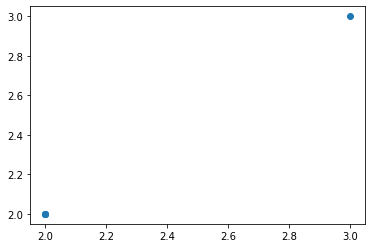

In [145]:
# code for step 3
x = df1.head(100)
x_train = x[:80]
x_test = x[80:]
np.zeros(shape=x.shape[0])
y = targets.head(100)
y_train = y[:80]
y_test = y[80:]
x_test = np.array(x_test)
y_test = np.array(y_test)
print(x_test.shape, y_test.shape)
print(x_train.shape, y_train.shape)
plt.scatter(x_test[0], x_test[1])
plt.show()

(120, 4) (120,)
(80, 4) (80,)


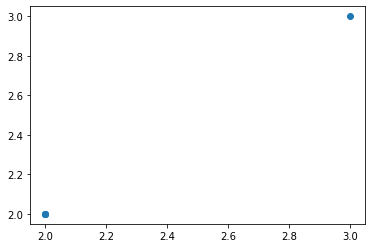

In [146]:
# code for step 3
x = df1.head(200)
x_train = x[:80]
x_test = x[80:]
np.zeros(shape=x.shape[0])
y = targets.head(200)
y_train = y[:80]
y_test = y[80:]
x_test = np.array(x_test)
y_test = np.array(y_test)
print(x_test.shape, y_test.shape)
print(x_train.shape, y_train.shape)
plt.scatter(x_test[0], x_test[1])
plt.show()

(286, 4) (286,)
(80, 4) (80,)


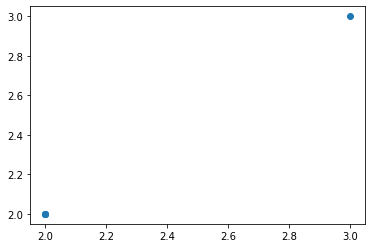

In [147]:
# code for step 3
x = df1.head(367)
x_train = x[:80]
x_test = x[80:]
np.zeros(shape=x.shape[0])
y = targets.head(367)
y_train = y[:80]
y_test = y[80:]
x_test = np.array(x_test)
y_test = np.array(y_test)
print(x_test.shape, y_test.shape)
print(x_train.shape, y_train.shape)
plt.scatter(x_test[0], x_test[1])
plt.show()

# 4. SVM's

### **Note : You are allowed to use sklearn's SVC classifier for steps 4.1 through 4.3**

https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html

---

# 4.1 Linear SVM


---


# Step 1: Implement a linear SVM model to classify the data points. (Look into the 'kernel' parameter).

In [148]:
# linear SVM
from sklearn.svm import SVC
svclassifier = SVC(kernel='linear')

# Step 2: Train the model

In [149]:
# training - linear SVM
print(x_train.shape, y_train.shape)
svclassifier.fit(x_train.values, y_train.values)
y_pred = svclassifier.predict(x_test)

(80, 4) (80,)


# Step 3: Predict for the test points using the model trained in the previous step

In [150]:
# predict - linear SVM
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred, zero_division=True))
new_arr = []
arr = classification_report(y_test, y_pred, zero_division=True, output_dict=True)
new_arr.append(arr.get('accuracy'))

[[64 15 10  4  0  0]
 [13 25  3  1  0  0]
 [11 10 32  1  2  0]
 [30  2  3  4  0  0]
 [ 7  4 14  5 11  0]
 [10  4  0  1  0  0]]
              precision    recall  f1-score   support

           1       0.47      0.69      0.56        93
           2       0.42      0.60      0.49        42
           3       0.52      0.57      0.54        56
           4       0.25      0.10      0.15        39
           5       0.85      0.27      0.41        41
           6       1.00      0.00      0.00        15

    accuracy                           0.48       286
   macro avg       0.58      0.37      0.36       286
weighted avg       0.52      0.48      0.44       286



# 4.2 Kernel SVM - Polynomial kernel

---



# Step 1: Implement a kernel SVM model with a polynomial kernel to classify the data points.

In [151]:
# kernel SVM - polynomial kernel
from sklearn.svm import SVC
classifier = SVC(kernel ='poly', degree = 4)

# Step 2: Train the model

In [152]:
# training - kernel SVM
print(x_train.shape, y_train.shape)
classifier.fit(x_train.values, y_train.values)
y_pred = classifier.predict(x_test)
classifier.fit(x_train.values, y_train.values)

(80, 4) (80,)


SVC(degree=4, kernel='poly')

# Step 3: Predict for the test points using the model trained in the previous step

In [153]:
# predict - kernel SVM
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))
arr = classification_report(y_test, y_pred, zero_division=True, output_dict=True)
new_arr.append(arr.get('accuracy'))

[[41 20 23  5  2  2]
 [ 9 24  3  1  4  1]
 [16  4 35  1  0  0]
 [16 14  1  4  2  2]
 [ 5  8  5 13  9  1]
 [ 8  3  0  3  0  1]]
              precision    recall  f1-score   support

           1       0.43      0.44      0.44        93
           2       0.33      0.57      0.42        42
           3       0.52      0.62      0.57        56
           4       0.15      0.10      0.12        39
           5       0.53      0.22      0.31        41
           6       0.14      0.07      0.09        15

    accuracy                           0.40       286
   macro avg       0.35      0.34      0.32       286
weighted avg       0.39      0.40      0.38       286



# 4.3 Kernel SVM - Gaussian kernel

---



# Step 1: Implement a kernel SVM model with a gaussian (Radian Basis function) kernel to classify the data points.

In [154]:
# kernel SVM - gaussian kernel
gaussclass = SVC(kernel ='rbf', degree = 4)

# Step 2: Train the model

In [155]:
# training - kernel SVM
print(x_train.shape, y_train.shape)
gaussclass.fit(x_train.values, y_train.values)
y_pred = classifier.predict(x_test)
gaussclass.fit(x_train.values, y_train.values)

(80, 4) (80,)


SVC(degree=4)

# Step 3: Predict for the test points using the model trained in the previous step

In [156]:
# predict - kernel SVM
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))
arr = classification_report(y_test, y_pred, zero_division=True, output_dict=True)
new_arr.append(arr.get('accuracy'))

[[41 20 23  5  2  2]
 [ 9 24  3  1  4  1]
 [16  4 35  1  0  0]
 [16 14  1  4  2  2]
 [ 5  8  5 13  9  1]
 [ 8  3  0  3  0  1]]
              precision    recall  f1-score   support

           1       0.43      0.44      0.44        93
           2       0.33      0.57      0.42        42
           3       0.52      0.62      0.57        56
           4       0.15      0.10      0.12        39
           5       0.53      0.22      0.31        41
           6       0.14      0.07      0.09        15

    accuracy                           0.40       286
   macro avg       0.35      0.34      0.32       286
weighted avg       0.39      0.40      0.38       286



# 4.4 - Evaluation


---


# Take the results from each predict step under sections 4.1, 4.2 and 4.3. Consider accuracy as the evaulation metric. Print the accuracies for each of the 3 SVM models.

Note: Do not use functions from sklearn.metrics

In [157]:
print("Linear SVM", new_arr[0], "Kernel SVM", new_arr[1], "Gaussian Kernel", new_arr[2])

Linear SVM 0.4755244755244755 Kernel SVM 0.3986013986013986 Gaussian Kernel 0.3986013986013986


In [158]:
# space for any imports for the following steps
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

# 5. Neural Networks



---


# 5.1 Single layer neural network

You can use either PyTorch or Tensorflow for the implementation

---

# Step 1: Implement a single layer neural network to classify the data points

In [159]:
train, test = train_test_split(df1, test_size=0.2)
train, val = train_test_split(train, test_size=0.2)
print(len(train), 'train examples')
print(len(val), 'validation examples')
print(len(test), 'test examples')

233 train examples
59 validation examples
74 test examples


In [160]:
def df_to_dataset(dataframe, shuffle=True, batch_size=32):
    dataframe = df.copy()
    labels = dataframe.pop('targets')
    ds = tf.data.Dataset.from_tensor_slices((dict(dataframe), labels))
    if shuffle:
        ds = ds.shuffle(buffer_size=len(dataframe))
    ds = ds.batch(batch_size)
    return ds

# Step 2: Train the model

In [161]:
batch_size = 32
train_ds = df_to_dataset(features_train, batch_size=batch_size)
val_ds = df_to_dataset(val, shuffle=False, batch_size=batch_size)
test_ds = df_to_dataset(features_test, shuffle=False, batch_size=batch_size)

erythema = tf.feature_column.numeric_column('erythema')
scaling = tf.feature_column.numeric_column('scaling')
definite_borders = tf.feature_column.numeric_column('definite borders')
itching = tf.feature_column.numeric_column('itching')
feature_columns = [erythema, scaling, definite_borders, itching]

feature_layer = tf.keras.layers.DenseFeatures(feature_columns)

model = tf.keras.Sequential([
  feature_layer,
  layers.Dense(128, activation='relu'),
  layers.Dense(128, activation='relu'),
  layers.Dropout(.1),
  layers.Dense(1)
])

# Step 3: Predict for the test points using the model trained in the previous step

In [162]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
              metrics=['accuracy'])

# 5.2 Multi - Layer neural network

---

# Step 1: Implement a multi - layer neural network to classify the data points

Additional note: use methods to avoid overfitting appropriately

In [163]:
model = Sequential()
model.add(Dense(16, activation = 'relu', kernel_initializer = 'he_normal', input_shape = (x_train.shape[1],)))
model.add(Dense(8, activation = 'relu', kernel_initializer = 'he_normal'))
model.add(Dense(1))

# Step 2: Train the model

In [164]:
model.compile(optimizer = 'adam', loss = 'mse', metrics = 'mae')
history = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=50,batch_size=64, verbose=0)
loss, mae = model.evaluate(x_test, y_test)

9/9 [==============================] - 0s 1ms/step - loss: 4.4310 - mae: 1.7472


# Step 3: Predict for the test points using the model trained in the previous step

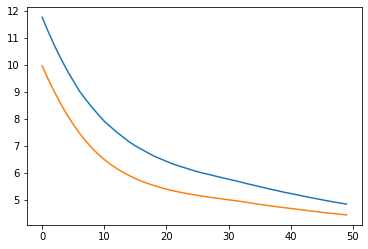

In [165]:
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='val')
plt.show()

# 5.3 Multi - Layer neural network

---

# Step 1: Implement a multi - layer neural network to classify the data points

**Note :** This must have a different network architecture from the model under section 5.2

**Additional note:** use methods to avoid overfitting appropriately

# Step 2: Train the model

# Step 3: Predict for the test points using the model trained in the previous step

# 5.4 - Evaluation


---


# Take the results from each predict step under sections 5.1, 5.2 and 5.3. Consider accuracy as the evaulation metric. Print the accuracies for each of the 3 neural network architectures.

Note: Do not use functions from sklearn.metrics

# 6 - Paragraph questions

---



# Q1 : Briefly explain the methods you used to prevent overfitting for the models under section 5.2 and 5.3

***space for Q1's answer***

The primary method I used to avoid overfitting was to train the models with more data. In every case, I have used the entirety of the dataset as opposed to only parts of it. ReLU may generally lead to overfitting, but that problem was overcome by using more data for the models.

# Q2: Compare the performances of models under sections 2, 3, 4 and 5 namely perceptron, descent procedure, SVM's and neural networks. List down few points on why you think certain models performed better than others

***space for Q2's answer***

The model at 5.2 performed the best. It employed ReLU, which performs significantly better than Sigmoid, and it also used more data to provide more accurate results. In addition, there was no overfitting.